In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score ,confusion_matrix , classification_report
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
df = pd.read_csv("pl-tables-1993-2024.csv")
df.head()

,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points,notes
0,1993,Manchester Utd,1,42,24,12,6,67,31,36,84,→ Champions League via league finish
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,→ UEFA Cup via league finish
2,1993,Norwich City,3,42,21,9,12,61,65,-4,72,→ UEFA Cup via league finish 1
3,1993,Blackburn,4,42,20,11,11,68,46,22,71,NaN
4,1993,QPR,5,42,17,12,13,63,55,8,63,NaN


In [5]:
df.columns

Index(['season_end_year', 'team', 'position', 'played', 'won', 'drawn', 'lost',
       'gf', 'ga', 'gd', 'points', 'notes'],
      dtype='object')

In [6]:
df.describe

<bound method NDFrame.describe of      season_end_year               team  position  played  won  drawn  lost  \
0               1993     Manchester Utd         1      42   24     12     6   
1               1993        Aston Villa         2      42   21     11    10   
2               1993       Norwich City         3      42   21      9    12   
3               1993          Blackburn         4      42   20     11    11   
4               1993                QPR         5      42   17     12    13   
..               ...                ...       ...     ...  ...    ...   ...   
641             2024          Brentford        16      38   10      9    19   
642             2024  Nottingham Forest        17      38    9      9    20   
643             2024         Luton Town        18      38    6      8    24   
644             2024            Burnley        19      38    5      9    24   
645             2024      Sheffield Utd        20      38    3      7    28   

     gf   ga  gd 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season_end_year  646 non-null    int64 
 1   team             646 non-null    object
 2   position         646 non-null    int64 
 3   played           646 non-null    int64 
 4   won              646 non-null    int64 
 5   drawn            646 non-null    int64 
 6   lost             646 non-null    int64 
 7   gf               646 non-null    int64 
 8   ga               646 non-null    int64 
 9   gd               646 non-null    int64 
 10  points           646 non-null    int64 
 11  notes            326 non-null    object
dtypes: int64(10), object(2)
memory usage: 60.7+ KB


In [8]:
df.isnull().sum()

season_end_year      0
team                 0
position             0
played               0
won                  0
drawn                0
lost                 0
gf                   0
ga                   0
gd                   0
points               0
notes              320
dtype: int64

In [9]:
df.drop('notes', axis=1, inplace=True)

In [10]:
df['league_winner'] = df['position'].apply(lambda x: 1 if x == 1 else 0)

In [11]:
df.columns

Index(['season_end_year', 'team', 'position', 'played', 'won', 'drawn', 'lost',
       'gf', 'ga', 'gd', 'points', 'league_winner'],
      dtype='object')

<Axes: xlabel='league_winner', ylabel='points'>

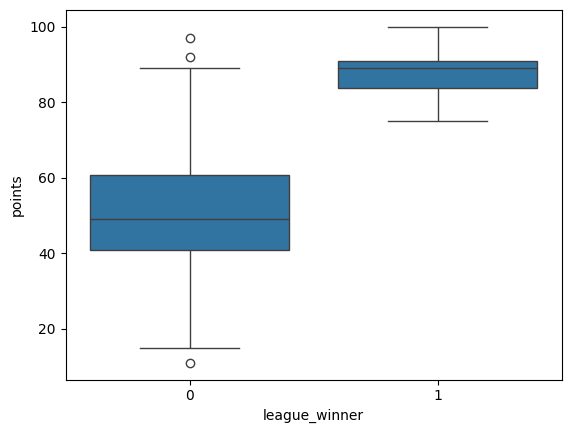

In [12]:
sns.boxplot(x='league_winner', y='points', data=df)

<Axes: xlabel='league_winner', ylabel='gd'>

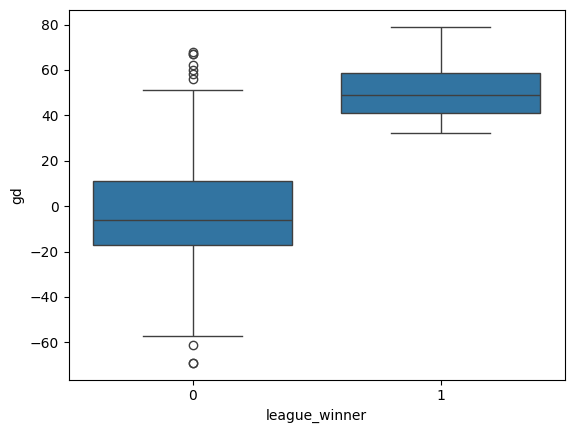

In [13]:
sns.boxplot(x='league_winner', y='gd', data=df)

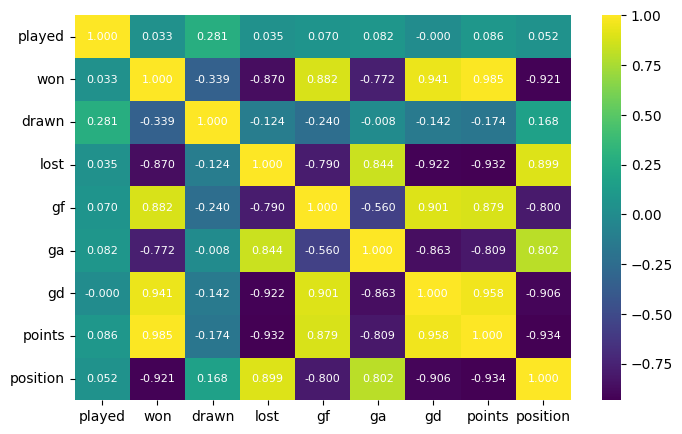

In [14]:
corr = df[['played', 'won', 'drawn', 'lost', 'gf', 'ga', 'gd', 'points', 'position']].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="viridis" ,annot_kws={"size": 8, "color": "white"})
plt.show()

In [15]:
df.groupby('team')['league_winner'].sum().sort_values(ascending=False)

team
Manchester Utd       13
Manchester City       8
Chelsea               5
Arsenal               3
Liverpool             1
Leicester City        1
Blackburn             1
Barnsley              0
Aston Villa           0
Blackpool             0
Birmingham City       0
Brighton              0
Burnley               0
Cardiff City          0
Charlton Ath          0
Bournemouth           0
Bradford City         0
Brentford             0
Bolton                0
Everton               0
Derby County          0
Crystal Palace        0
Coventry City         0
Ipswich Town          0
Hull City             0
Fulham                0
Huddersfield          0
Luton Town            0
Leeds United          0
Middlesbrough         0
Newcastle Utd         0
Norwich City          0
Nottingham Forest     0
Oldham Athletic       0
Portsmouth            0
QPR                   0
Reading               0
Sheffield Utd         0
Sheffield Weds        0
Southampton           0
Stoke City            0
Sunderland 

In [16]:
current_rows = df.shape[0]
current_rows

646

In [17]:
df.drop_duplicates(inplace=True)
preprocessed_rows = df.shape[0]

In [18]:
preprocessed_rows

646

No duplicates found

In [19]:
print('--- DATATYPES BEFORE ---')
print(df.dtypes)
numeric_cols = ['season_end_year', 'position', 'played', 'won', 'drawn', 'lost', 'gf', 'ga', 'gd', 'points']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
if 'team' in df.columns:
    df['team'] = df['team'].astype(str)
print('--- DATATYPES AFTER ---')
print(df.dtypes)

--- DATATYPES BEFORE ---
season_end_year     int64
team               object
position            int64
played              int64
won                 int64
drawn               int64
lost                int64
gf                  int64
ga                  int64
gd                  int64
points              int64
league_winner       int64
dtype: object
--- DATATYPES AFTER ---
season_end_year     int64
team               object
position            int64
played              int64
won                 int64
drawn               int64
lost                int64
gf                  int64
ga                  int64
gd                  int64
points              int64
league_winner       int64
dtype: object


In [20]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
le_dict = {}
print('LABEL ENCODING')
for col in cat_cols:
    le = LabelEncoder()
    df[col + '_le'] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le
    print(f"{col} encoded to {col + '_le'}")

LABEL ENCODING
team encoded to team_le


In [21]:
df.columns

Index(['season_end_year', 'team', 'position', 'played', 'won', 'drawn', 'lost',
       'gf', 'ga', 'gd', 'points', 'league_winner', 'team_le'],
      dtype='object')

In [22]:
df.head()

,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points,league_winner,team_le
0,1993,Manchester Utd,1,42,24,12,6,67,31,36,84,1,28
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,0,1
2,1993,Norwich City,3,42,21,9,12,61,65,-4,72,0,31
3,1993,Blackburn,4,42,20,11,11,68,46,22,71,0,4
4,1993,QPR,5,42,17,12,13,63,55,8,63,0,35


In [23]:
team_le = le_dict['team']
for label_value, team_name in enumerate(team_le.classes_):
    print(f"{team_name}: {label_value}")

Arsenal: 0
Aston Villa: 1
Barnsley: 2
Birmingham City: 3
Blackburn: 4
Blackpool: 5
Bolton: 6
Bournemouth: 7
Bradford City: 8
Brentford: 9
Brighton: 10
Burnley: 11
Cardiff City: 12
Charlton Ath: 13
Chelsea: 14
Coventry City: 15
Crystal Palace: 16
Derby County: 17
Everton: 18
Fulham: 19
Huddersfield: 20
Hull City: 21
Ipswich Town: 22
Leeds United: 23
Leicester City: 24
Liverpool: 25
Luton Town: 26
Manchester City: 27
Manchester Utd: 28
Middlesbrough: 29
Newcastle Utd: 30
Norwich City: 31
Nottingham Forest: 32
Oldham Athletic: 33
Portsmouth: 34
QPR: 35
Reading: 36
Sheffield Utd: 37
Sheffield Weds: 38
Southampton: 39
Stoke City: 40
Sunderland: 41
Swansea City: 42
Swindon Town: 43
Tottenham: 44
Watford: 45
West Brom: 46
West Ham: 47
Wigan Athletic: 48
Wimbledon: 49
Wolves: 50


In [24]:
df.head()

,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points,league_winner,team_le
0,1993,Manchester Utd,1,42,24,12,6,67,31,36,84,1,28
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,0,1
2,1993,Norwich City,3,42,21,9,12,61,65,-4,72,0,31
3,1993,Blackburn,4,42,20,11,11,68,46,22,71,0,4
4,1993,QPR,5,42,17,12,13,63,55,8,63,0,35


In [25]:
df.drop(['season_end_year','team','team_le'], axis=1, inplace=True)

In [26]:
X = df.drop(columns=['league_winner', 'position', 'points'])
y = df['league_winner']

In [27]:
X.head()

,played,won,drawn,lost,gf,ga,gd
0,42,24,12,6,67,31,36
1,42,21,11,10,57,40,17
2,42,21,9,12,61,65,-4
3,42,20,11,11,68,46,22
4,42,17,12,13,63,55,8


**model 1 -> random forest classifier**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy : 0.9690721649484536
Precision: 1.0
Recall   : 0.4
F1 Score : 0.5714285714285714

Confusion Matrix:
 [[184   0]
 [  6   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       184
           1       1.00      0.40      0.57        10

    accuracy                           0.97       194
   macro avg       0.98      0.70      0.78       194
weighted avg       0.97      0.97      0.96       194



In [30]:
# y_train_pred = clf.predict(X_train)

# print("Train Accuracy :", accuracy_score(y_train, y_train_pred))
# print("Test Accuracy  :", accuracy_score(y_test, y_pred))

-----------------------------------------------------------------------------------------

**cross validation score**

-----------------------------------------------------------------------------------------


In [31]:
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(clf, X, y, cv=5)
# print("CV Accuracy scores:", scores)
# print("Mean CV Accuracy  :", scores.mean())


---------------------------------------------------------------------------------------------------------------------------

**After changing hyperparametrs**

---------------------------------------------------------------------------------------------------------------------------

In [32]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.tree import DecisionTreeClassifier


# pipeline = Pipeline([
#     ("dt", DecisionTreeClassifier(random_state=42))
# ])

# param_grid = {
#     "dt__criterion": ["gini", "entropy", "log_loss"], 
#     "dt__max_depth": [None, 3, 5, 10, 20],
#     "dt__min_samples_split": [2, 5, 10],
#     "dt__min_samples_leaf": [1, 2, 5, 10],
#     "dt__max_features": [None, "sqrt", "log2"]
# }

# grid = GridSearchCV(
#     pipeline,
#     param_grid,
#     cv=5,
#     scoring="accuracy",  
#     n_jobs=-1
# )

# grid.fit(X_train,y_train)

# # Best params & CV score
# print("Best Params:", grid.best_params_)
# print("Best CV Accuracy:", grid.best_score_)

# # Use best estimator to predict test set
# y_pred = grid.best_estimator_.predict(X_test)

# # Classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

**SMOTE implementation**

In [33]:
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# print("Before SMOTE:", y_train.value_counts())
# print("After SMOTE :", y_train_smote.value_counts())

**# MODEL 2 Random Forest on SMOTE-balanced data**

In [35]:
# Random Forest on SMOTE-balanced data
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

clf_smote = RandomForestClassifier(n_estimators=200, random_state=42)
clf_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = clf_smote.predict(X_test)

acc = accuracy_score(y_test, y_pred_smote)
prec = precision_score(y_test, y_pred_smote)
rec = recall_score(y_test, y_pred_smote)
f1 = f1_score(y_test, y_pred_smote)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))
print("-"*90)

Accuracy : 0.9587628865979382
Precision: 0.5833333333333334
Recall   : 0.7
F1 Score : 0.6363636363636364

Confusion Matrix:
 [[179   5]
 [  3   7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       184
           1       0.58      0.70      0.64        10

    accuracy                           0.96       194
   macro avg       0.78      0.84      0.81       194
weighted avg       0.96      0.96      0.96       194

------------------------------------------------------------------------------------------


**CHanging hyper parameters for SMOTE**

In [36]:
# sampling_strategies = [0.3, 0.5, 0.7]

# results = []

# for strategy in sampling_strategies:
    
#     print(f"\n=== SMOTE with sampling_strategy={strategy} ===")
    
#     smote = SMOTE(sampling_strategy=strategy, random_state=42)
#     X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#     clf_smote = RandomForestClassifier(n_estimators=200, random_state=42)
#     clf_smote.fit(X_train_smote, y_train_smote)

#     y_pred_smote = clf_smote.predict(X_test)

#     acc = accuracy_score(y_test, y_pred_smote)
#     prec = precision_score(y_test, y_pred_smote)
#     rec = recall_score(y_test, y_pred_smote)
#     f1 = f1_score(y_test, y_pred_smote)

#     results.append({
#         "sampling_strategy": strategy,
#         "Accuracy": acc,
#         "Precision": prec,
#         "Recall": rec,
#         "F1": f1
#     })

#     print("Accuracy :", acc)
#     print("Precision:", prec)
#     print("Recall   :", rec)
#     print("F1 Score :", f1)
#     print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
#     print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))
#     print("-"*90)


# results_df = pd.DataFrame(results)
# print("\n=== Summary of Results ===")
# print(results_df)

**MODEL 3 - Neural Networks Implementation**

In [37]:
X_train.columns

Index(['played', 'won', 'drawn', 'lost', 'gf', 'ga', 'gd'], dtype='object')

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train_smote, epochs=20, batch_size=16, verbose=1)


y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

c:\Users\srias\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4607 - loss: 0.7713
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8847 - loss: 0.4728
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9359 - loss: 0.3202
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9452 - loss: 0.2194
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9548 - loss: 0.1800
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9543 - loss: 0.1541
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9368 - loss: 0.1656
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9545 - loss: 0.1239
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9557 - loss: 0.1194
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9631 - loss: 0.1001
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9541 - loss: 0.1281
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9631 - lo

**I am using nn + smote model as deploying model and rf + smote as backup model**

In [42]:
#saving model 2
import joblib
joblib.dump(clf_smote, "rf_smote_model.pkl")

# clf_smote.save("rf_smote_model.keras")
#clf_smote = joblib.load("rf_smote_model.pkl")

['rf_smote_model.pkl']

In [40]:
# Saving model 3
model.save("nn_smote_model.keras")

# Save scaler
joblib.dump(scaler, "scaler.pkl")

#loading
# from tensorflow.keras.models import load_model
# import joblib

# model = load_model("nn_smote_model.keras")
# scaler = joblib.load("scaler.pkl")

['scaler.pkl']